<a href="https://colab.research.google.com/github/romanfen/F21DL-G6/blob/main/Lab11_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up and Imports

In [189]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [190]:
import matplotlib.pyplot as plt
import numpy as np

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Smile Data

In [192]:
X = np.load('/content/drive/MyDrive/Colab Notebooks/smiley_X.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/smiley_y.npy')

In [193]:
class_names = ['smile','frown']

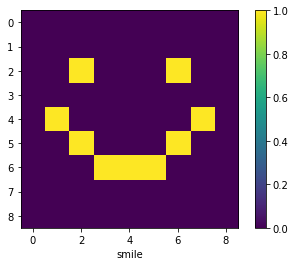

In [194]:
def showImage(img,group):
  plt.figure()
  plt.imshow(X[img].squeeze())    # data is actually a 3d array, squeeze slices it into a 2d for imaging
  plt.colorbar()
  plt.grid(False)
  plt.xlabel(class_names[int(y[group])])
  plt.show()

showImage(0,0)

In [195]:
y[0]

0.0

# Training and Test Sets

In [196]:
X.shape, y.shape

((144, 9, 9, 1), (144,))

Split data 80% train and 20% test

In [197]:
x_train, x_test, y_train, y_test = X[:114], X[114:], y[:114], y[114:]
x_train.shape

(114, 9, 9, 1)

# Visualise Data

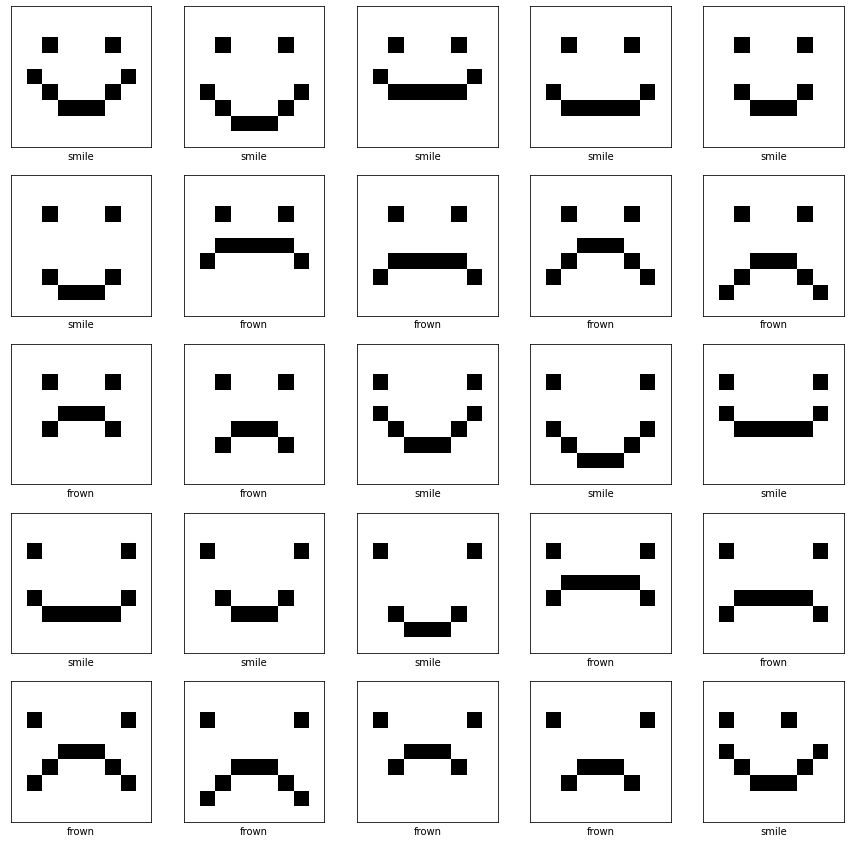

In [198]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [199]:
x_train.shape

(114, 9, 9, 1)

# ANN Model

## Building Model

In [200]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9, 9)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [201]:
nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training Model

In [202]:
nn_model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2984 - accuracy: 0.1404
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 2.0067 - accuracy: 0.4298
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 1.7389 - accuracy: 0.5789
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 1.4933 - accuracy: 0.6140
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 1.2703 - accuracy: 0.6404
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0691 - accuracy: 0.7018
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.8922 - accuracy: 0.7807
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7408 - accuracy: 0.8947
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6160 - accuracy: 0.9912
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 1.0000


## Evaluating Model

In [203]:
nn_model.metrics_names

['loss', 'accuracy']

In [204]:
test_loss, test_acc = nn_model.evaluate(x_test,  y_test, verbose=1)
print('\nTest accuracy:', test_acc)

1/1 [==============================] - 0s 129ms/step - loss: 0.4580 - accuracy: 1.0000

Test accuracy: 1.0


## Prediction

In [205]:
classifications = nn_model.predict(x_test)

1/1 [==============================] - 0s 56ms/step


In [206]:
print(classifications[3])

[0.26570782 0.6370511  0.01099651 0.01501044 0.00665256 0.00610204
 0.01234926 0.01503031 0.00916188 0.02193813]


In [207]:
np.argmax(classifications[3])

1

In [208]:
np.max(classifications[3])

0.6370511

In [209]:
class_names[np.argmax(classifications[3])]

'frown'

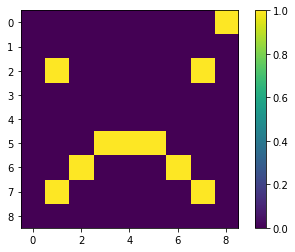

In [210]:
plt.imshow(x_test[3].squeeze())
plt.colorbar()
plt.grid(False)

In [211]:
def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

In [212]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

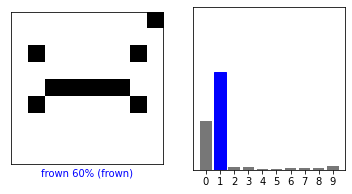

In [213]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test.squeeze(), x_test.squeeze())
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

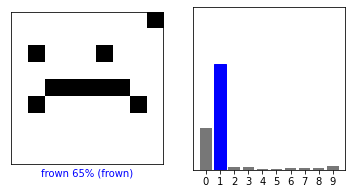

In [214]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test.squeeze(), x_test.squeeze())
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

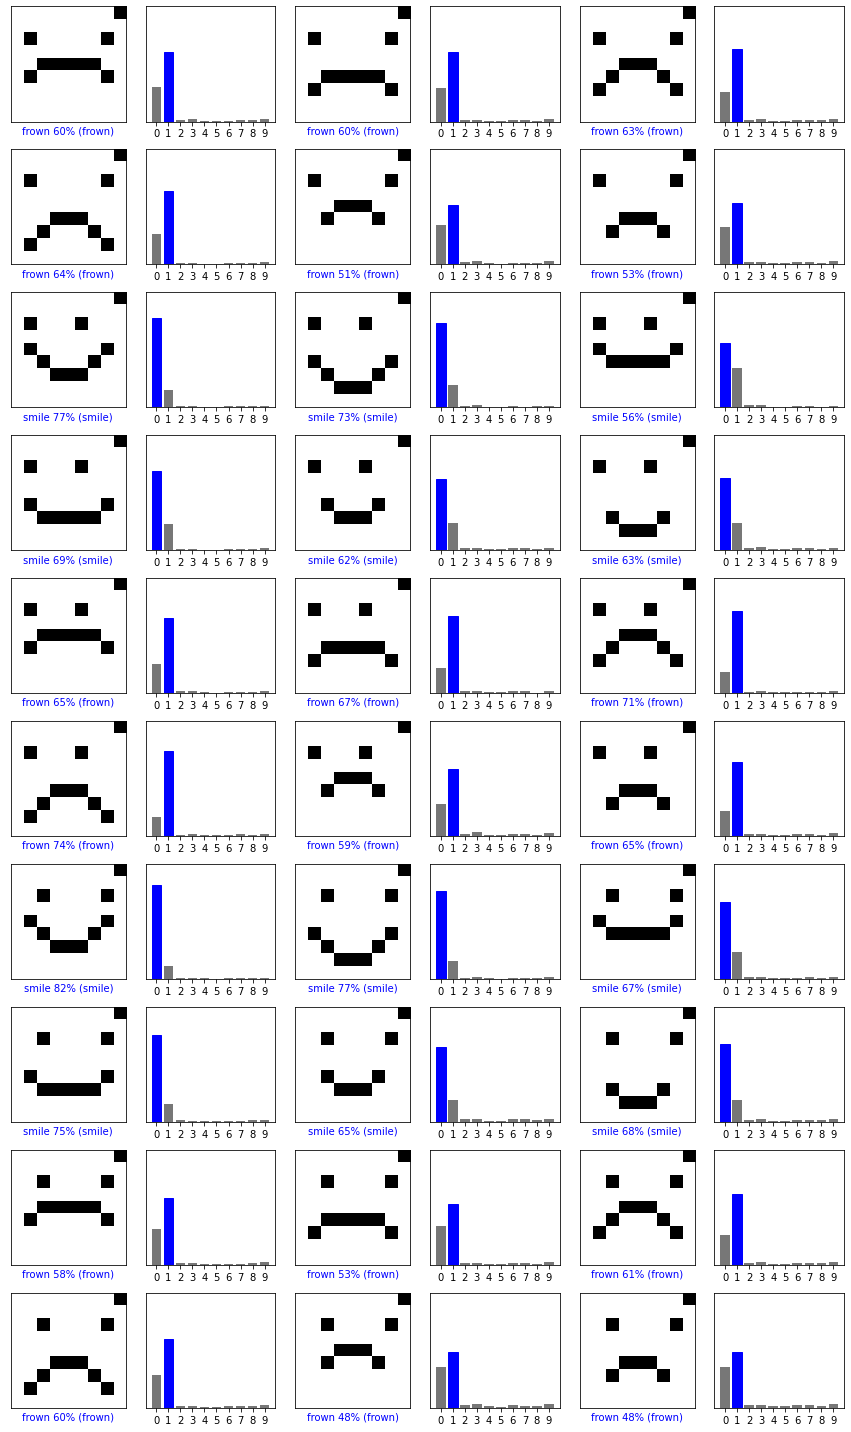

In [215]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], y_test.squeeze(), x_test.squeeze())
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], y_test.squeeze())
plt.tight_layout()
plt.show()

# CNN Model

## Building Model

In [216]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D((2,2), padding='same'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 2, 2, 64)          36928     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 128)             

## Training Model

In [217]:
cnn_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 12ms/step - loss: 2.2189 - accuracy: 0.2982
Epoch 2/5
4/4 [==============================] - 0s 10ms/step - loss: 1.8925 - accuracy: 0.7105
Epoch 3/5
4/4 [==============================] - 0s 11ms/step - loss: 1.4507 - accuracy: 0.7368
Epoch 4/5
4/4 [==============================] - 0s 12ms/step - loss: 0.9642 - accuracy: 0.7895
Epoch 5/5
4/4 [==============================] - 0s 11ms/step - loss: 0.6392 - accuracy: 0.9123


## Evaluating Model

In [218]:
test_loss, test_acc = cnn_model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9333333373069763


## Prediction

In [219]:
classifications = cnn_model.predict(x_test)
print(classifications[3])

1/1 [==============================] - 0s 102ms/step
[3.7185478e-01 6.0033381e-01 1.2152168e-03 2.4038393e-03 4.4545485e-04
 2.5275308e-03 5.5558560e-03 1.2753619e-02 1.2308285e-03 1.6789916e-03]


In [220]:
class_names[np.argmax(classifications[18])]

'smile'

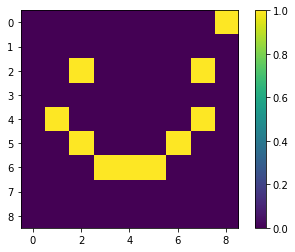

In [221]:
plt.imshow(x_test[18].reshape(9,9))
plt.colorbar()
plt.grid(False)

# Visualise Layers

1/1 [==============================] - 0s 18ms/step


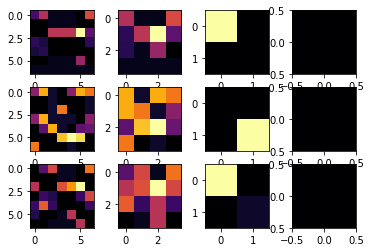

In [222]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in cnn_model.layers]
activation_model = tf.keras.models.Model(inputs = cnn_model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Evaluation Methods

## k-fold evaluation

In [223]:
from sklearn.model_selection import ShuffleSplit

def split_data(X):
  sp = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
  sp.get_n_splits(X)
  return sp

sp = split_data(X)

TRAIN: [124  31  98  36  16  10  93 111  42 118 127  96  60   0  84  28  40  86
  24  25  23 115  67  44  15  95  39  22  68  80 140  47  30 112  76 137
  33  81 142  62 139 135  53   5  85 109  49  35  77  34 131   7  43  70
  89  83 123 129   8  13 108 114   3  17  38  72 120   6 101   2 122  54
  50 104  46 105  61 141  79 136  91  41  58  90  48  88 126  21  57  75
  32 138  59  63 128  37  29 107 134   1  52 130 103  99 116  87  74 121
 143  20  71 106  14  92 102] 
 TEST: [117  19  82  97  56  12 132  65  66  18  51  78  94 133 100  64  27  69
 125  73  11 119 110 113  55  45   9   4  26]


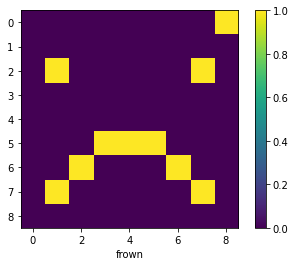

TRAIN: [ 24 113  68 132  17  49   6 121  67 120 119  25 126 129  19  77 130  90
  64  93  32  15  47  63  21 115  33  81   4 105  37  16  75  98  10  54
  66 140 138  52  73  18 101  53 112  87  86  55  97   1  38  11  84  57
  92 133 127 125  78  23 111  50  36  99   8 100  71  69   2  76 103 143
   0  96 108 142  88  91  74 118  29  83  43 107 124 122   5 116  56  61
  44 137  65  27  85 114  58  70  31  12  35  28 131 134  51  95  62 123
  41  89  14 136  26 102 141] 
 TEST: [ 30 117  79 128   3 139   7  45  40  48 110 106  20  82  80  13  72  34
 104  60  59  94  46  42  39   9  22 135 109]


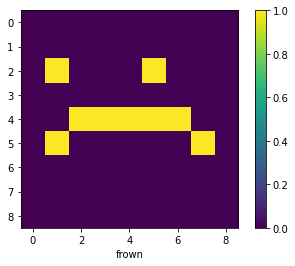

TRAIN: [143  30 141 104  79  33 100  14  71  11  13  15 107   0 135  35 124  12
  69 142 136  61  91  28  38  95  73  42   8  77  39  89  25   1  41 105
  65  22  46  78 139  82  76  57 110  24  17 123 121  31  62  59  52  86
  23  36   5  45 102  43 122  48  99  34   3  18 120  60  68 138  63  27
  96 113 129  97 106  26 125 132  50 108 101  37  29 134  21  85 114  58
  75 128 130  16  66   6   7 119  19  47  20  32  67  53  81 109 127  92
  98 111  83 103 112  74 115] 
 TEST: [ 40  49  54  44   2  72 133 140  93  70 118 131  80  55 126  51  56   4
  10  84 116   9  88 137  64  87 117  90  94]


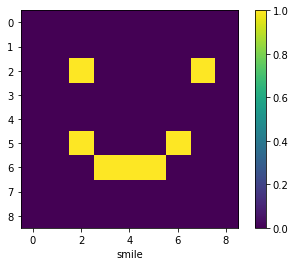

TRAIN: [ 78  37  20  24  41  10  96   6  82  40  55  53  52   7 107  16 129  67
  72  45  30  64  12 101  43 113  80  39  65 104   2  69  36  42 142 141
 109  86  34  49  11  73  31   1  23 127   3  83 118 130 139 122  51 132
  94   9 133  32  38  84 143  99 136 106 120  98 134  93  46 112 138  77
  28  56  85 100  50 124  25  75  66  92  21  68 140  63 102  60  15 131
 135 108 103  88  47 117  95  33 110   0 121 137 128 126  22  61 116  89
  57  91  18  62 119 105 123] 
 TEST: [ 19  87  90  81   5  14 111  97  27  13  58 114  26  79  54  71 125  48
  17  76  74  29  44  59  70   8   4 115  35]


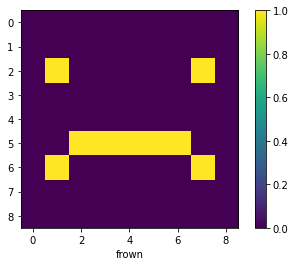

TRAIN: [ 67 126 129  62  63  77  14 113 105 109  72 132  79  88  10  47 121  20
  46  50  31  78  43   5 117  87  32  55 128  48 120 136 130   2   0  71
 104  19 101  97  81  66 102  76 114  53  60 141  30  69  35   3  44  70
 100  64   7 133  37  36  28 143  65  26  49 103 131  39  12  45   6  16
 115  73 137 138  17  74 106  92  86  34   4  94  13 119  57  41 123 108
  38  56  15  22  52 139  84 122 134  24  98  68 116 110  82  51 127  27
   8  75  99  18 140  85 111] 
 TEST: [ 59  61   1 118 124  96  42  95  83  40  25  33  23  89 125 112  90  54
  21  80  29  58  91 107 142  93   9  11 135]


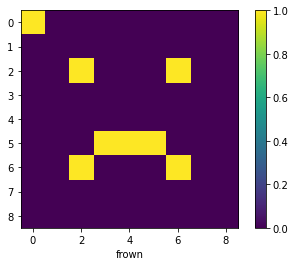

TRAIN: [130  47  12   1 112  74  90  60  19  40  70  45 139 126  28 132  83  41
  57  93  23 120  87  51  75  66 123  14 137  17 127 136  67 110  59  63
  37 141  65  13 103 140  96  56 107  79  86  11  49 105  53  95 128  38
  71  33  31 131  61   3 121  44  50 116  72  77 129  16  82  99  73  36
 134 100  22  52   2 101 135  94  68  80  91   5  54 111  20   0  98 104
  97 143  76  48  26  58  85  88  62  25  84  10  64 117  32 118   4 108
  29  55   9  46 114  81 133] 
 TEST: [ 24  92  34 106  39   6  35 109  89 113 115 125  78   8 119 124 142  42
   7  21 138  27 102  69 122  18  43  15  30]


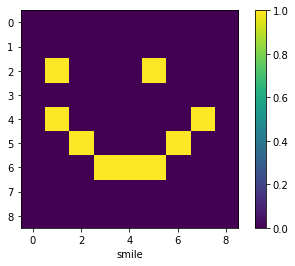

TRAIN: [ 18  70  76  48  96  42  59 108  95  57  81  92  19 105 124  49  64 121
  36  75  53  99   8  23  30 110  10  29   3 125  54  61 133  20 143  52
  32  68 101 102  94 104 116   5  40  41  39 119 136  97  66   9  67 127
  12 128  24  43 118  16  56  38  73 109  88  63  14  37  17  22   2   6
 113  58 111 122   1  87 135  86  27 138  13  85 129 131  78  51  98 112
   7 141  35 140  80  60  47  62 106  93  55 120  46  25  72  44  77  33
  45  89  11 132   0  69  21] 
 TEST: [117 115  71  31 100  34  28  15  50 137  65  26 134 103 123 126 107  91
  84  82 130  74 114  90 142  79   4 139  83]


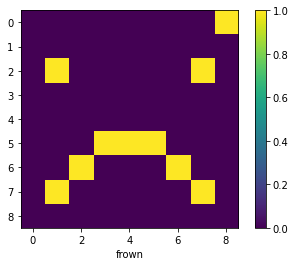

TRAIN: [ 47  87  11 125 118  45   7  55 139  23  56  30 142  54  67  76 117   9
   1 112 132  53  57  99 131  97  80  35  26  73 102  51  32  28  46  79
 110  91 136   6  66   5  69 121  86 140  52  65 135  24  14 138  22 133
  50  31 106  38 108 114  17 109  41  88   3 128  25 124  82   4  36  84
 123  29 111  13 137 104  10  71  92 113 127  21  63  39   0  34  98  75
  33 134  74 119 116  77  49 107  59  61  68  48  94  93  37   8  16  72
 100  62  64  83 143  12 129] 
 TEST: [ 81 120  42  96   2  78  40 115 103  15  85 105  20 130 141 122  89  70
  90  44  58  19 101 126  95  43  27  18  60]


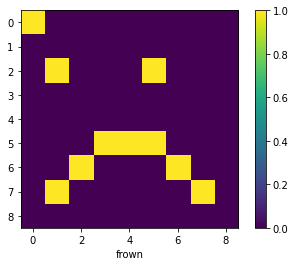

TRAIN: [128  57  22  95  93 110 143   9 108   2  38 106   7  65   3  98  64  75
  97 112  13  67  17  63 115  15  82  59  44  68  79  29  31  61  18  55
  88  12 120 111  60  78  19  99  84  80  27 140  21 102 134  48  32  69
 107  70 101  23 118 135  58  42  16  94  33  90  81   6   1  37  74 141
  24 119  34 132  25 137  51  73   8  52  72  46 127  14 133 114  54 123
  62 130  56  86  53  35 109  89  20 100  45   0  10  40  39  28  50 136
 121  30  91 105 126  71  36] 
 TEST: [125 104 129  49 139  11   5 142 124  43 131  66 117 103  47  77 113  76
 122   4 116  26  87 138  85  92  41  96  83]


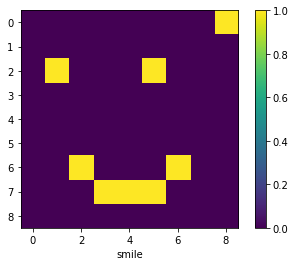

TRAIN: [ 82  60 126   0  91  96  67  68  71 110  62 119  51  18 131  55  32 130
 104 141 135  89  34 101  38  48 114 117  79 134  20 100 105 108 140  77
  50  64  53 137  63  45  61 106  88  44   9  70 136  11 116   5  30  56
  26  93  75 122  99  16  33  37  40  41 143  17  69  74 133 125  97 139
  57  25   3  21  72 102  24  65  39   8  13 113 120  95  86 109  58  29
  73  80  23 107  85 121 115  98  43  52  36   4  19 118 129  10  46 128
   1  81  28  35 124 111  84] 
 TEST: [ 22 142  14 138 103  90  92  66  27  76  12 132  15  47  54 127  87 112
  42  59  78  49  94  83   2   6  31 123   7]


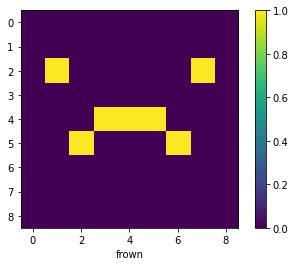

In [224]:
for train_index, test_index in sp.split(X, y):
  print("TRAIN:", train_index, "\n TEST:", test_index)
  showImage(test_index[0], test_index[0])

In [225]:
accuracies = []
for train_index, test_index in sp.split(X, y):
  cnn_model.fit(X[train_index], y[train_index], epochs=5)
  accuracies.append(cnn_model.evaluate(X[train_index], y[train_index], verbose=0)[1])

Epoch 1/5
4/4 [==============================] - 0s 8ms/step - loss: 0.4842 - accuracy: 0.9130
Epoch 2/5
4/4 [==============================] - 0s 8ms/step - loss: 0.4035 - accuracy: 0.9130
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 0.3487 - accuracy: 0.9217
Epoch 4/5
4/4 [==============================] - 0s 8ms/step - loss: 0.2781 - accuracy: 0.9130
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 0.2406 - accuracy: 0.9130
Epoch 1/5
4/4 [==============================] - 0s 8ms/step - loss: 0.1870 - accuracy: 1.0000
Epoch 2/5
4/4 [==============================] - 0s 8ms/step - loss: 0.1550 - accuracy: 0.9043
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 0.1162 - accuracy: 0.9826
Epoch 4/5
4/4 [==============================] - 0s 8ms/step - loss: 0.1024 - accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 0.0752 - accuracy: 1.0000
Epoch 1/5
4/4 [==============================] - 0

In [226]:
accuracies

[0.991304337978363, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]